<div style="background-color: #ccffcc; padding: 10px;">
    <h1> Tutorial 4 </h1> 
    <h2> Gaussian Processes </h2>
</div>    

## Overview




<div style="background-color: #ccffcc; padding: 10px;">

<h1> Gaussian Processes </h1>

This tutorial is based on work done by Ollie Pollard on using Gaussian Processess to predict sea level rise. Following the steps outlines in this [visual aritcle](https://distill.pub/2019/visual-exploration-gaussian-processes/). Gaussian processes are often used make predictions about our data by incoporating prior knowledge often to fit a function to a data set. For a given set of training points, there are potentially infinitely many functions that fit the data. Gaussian processes offer an elegant solution to this problem by assigning a probability to each of these functions. The mean of this probability distribution then represents the most probable characterization of the data. 


    
## Recommended reading 
* [Overview of Linear Regression](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)
* [An Intuative Guide to Gaussian Processes](https://towardsdatascience.com/an-intuitive-guide-to-gaussian-processes-ec2f0b45c71d)
    
</div>



<hr>


<div style="background-color: #e6ccff; padding: 10px;">
    
<h1> Machine Learning Theory </h1>
    
<a href="https://distill.pub/2019/visual-exploration-gaussian-processes/">
                <img src="animations/post_sample.gif">
</a>
    
This tutorial is mainly focusing on using python to explore Gaussian Processes please read the full [visual aritcle](https://distill.pub/2019/visual-exploration-gaussian-processes/) for a more indepth explaination.
    
The [gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) froms the building blocks of Gaussian Processes. 
   $\displaystyle f(x) ={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$
 
<a href="https://distill.pub/2019/visual-exploration-gaussian-processes/">
    <img src="animations/gaussian_dist.gif">
</a>

For Machine Learning Gaussian Processes we are interested in the [multivariate case](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). The multivariate Gaussian distribution is defined by a mean vector $\mu$ (the expected value of the distribution) and a covariance matrix $\Sigma$. $\Sigma$ models the variance along each dimension and determines how the different random variables are correlated. If $X$ follows a normamal distribution:
    
$\begin{equation} X = \begin{bmatrix} X_1 \\ X_2 \\ \vdots \\ X_n \end{bmatrix} \sim \mathcal{N}(\mu, \Sigma) \end{equation}$
 
The covariance matrix $\Sigma$ describes the shape of the distribution. It is defined in terms of the expected value $E$
    
$\begin{equation}    
\Sigma = \text{Cov}(X_i, X_j) = E \left[ (X_i - \mu_i)(X_j - \mu_j)^T \right]
\end{equation}$
  
Gaussian distributions have the nice algebraic property of being closed under conditioning and marginalization. Being closed under conditioning and marginalization means that the resulting distributions from these operations are also Gaussian, which makes many problems in statistics and machine learning tractable. 
Marginalization and conditioning both work on subsets of the original distribution and we will use the following notation:

$\begin{equation} 
P_{X,Y} = \begin{bmatrix} X \\ Y \end{bmatrix} \sim \mathcal{N}(\mu, \Sigma) = \mathcal{N} \left( \begin{bmatrix} \mu_X \\ \mu_Y \end{bmatrix}, \begin{bmatrix} \Sigma_{XX} \, \Sigma_{XY} \\ \Sigma_{YX} \, \Sigma_{YY} \end{bmatrix} \right)   
\end{equation}$

With $X$ and $Y$ representing subsets of original random variables.   
Through marginalization we can extract partial information from multivariate probability distributions. In particular, given a normal probability distribution $P(X,Y)$ over vectors of random variables $X$ and $Y$, we can determine their marginalized probability distributions in the following way:

$\begin{aligned}
X \sim \mathcal{N}(\mu_X, \Sigma_{XX}) \\
Y \sim \mathcal{N}(\mu_Y, \Sigma_{YY})
\end{aligned}$
    
The interpretation of this equation is that each partition $X$ and $Y$ only depends on its corresponding entries in $\mu$ and $\Sigma$. To marginalize out a random variable from a Gaussian distribution we can simply drop the variables from $\mu$ and $\Sigma$.
    
$\begin{equation}  
p_X(x) = \int_y p_{X,Y}(x,y)dy = \int_y p_{X|Y}(x|y) p_Y(y) dy
\end{equation}$
    
The way to interpret this equation is that if we are interested in the probability density of $X=x$, we need to consider all possible outcomes of $Y$ that can jointly lead to the result. 

Another important operation for Gaussian processes is conditioning. It is used to determine the probability of one variable depending on another variable. Similar to marginalization, this operation is also closed and yields a modified Gaussian distribution. This operation is the cornerstone of Gaussian processes since it allows Bayesian inference. Conditioning is defined by: 
    
    
$\begin{aligned}
X|Y \sim \mathcal{N}(\:\mu_X + \Sigma_{XY}\Sigma_{YY}^{-1}(Y - \mu_Y),\: \Sigma_{XX}-\Sigma_{XY}\Sigma_{YY}^{-1}\Sigma_{YX}\:) \\
Y|X \sim \mathcal{N}(\:\mu_Y + \Sigma_{YX}\Sigma_{XX}^{-1}(X - \mu_X),\: \Sigma_{YY}-\Sigma_{YX}\Sigma_{XX}^{-1}\Sigma_{XY}\:) \\
\end{aligned}$

The new mean only depends on the conditioned variable, while the covariance matrix is independent from this variable. 

</div>    
  

  
<div style="background-color: #cce5ff; padding: 10px;">

<h1> Python </h1>


 
    
## Tensorflow and GPflow
    
There are many machine learning python libraries available, [TensorFlow](https://www.tensorflow.org/) a is one such library although it now comes bundled with [TensorFlow](https://www.tensorflow.org/). Throughout this tutorial, you will see some complex machine learning tasks executed in just a few lines of code by calling [GPflow](https://gpflow.readthedocs.io/en/master/) functions which uses Tensor flow. If you have GPUs on the machine you are using these python libraries will automatically use them and run the code even faster!

## Further Reading
* [GPflow example Notebooks](https://gpflow.readthedocs.io/en/develop/notebooks_file.html)

</div>
    
<hr>

<div style="background-color: #ffffcc; padding: 10px;">
    
<h1> Requirements </h1>

These notebooks should run on a standard laptop with the correct python environment.

<h2> Python Packages: </h2>

* Python 3.8
* tensorflow > 2.1
* gpflow 2.1 *(must be installed via pip to get latest version)*
* numpy 
* matplotlib
* plotly
* scipy


<h2> Data Requirements</h2>
    
This notebook referes to some data included in the git hub repositroy in the [data](data) folder
    
</div>


**Contents:**

1. [Overview of Gausian Processes](#Overview-of-Gausian-Processes)
2. [Sea Level Example](#Sea-Level-Example)
1. [Load Data](#Load-Data)
2. [Normalise Data](#Normalise-Data)
3. [Plot Data](#Plot-Data)
4. [Define GP flow model](#Define-GP-flow-model)
5. [Optamization](#Optamization)
6. [Prediction](#Prediction)
7. [Cross Validation](#Cross-Validation)
8. [Plot High Stands](#Plot-High-Stands)


<div style="background-color: #cce5ff; padding: 10px;">
    
Load in all required modules and turn off warnings. If you have no [GPU's]() available

</div>


In [1]:
# For readability: disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import modules
import gpflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from gpflow.utilities import print_summary
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal

gpflow.config.set_default_summary_fmt("notebook")
plt.style.use("seaborn-whitegrid")

2021-07-27 10:36:09.599087: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-27 10:36:09.599112: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Overview of Gausian Processes

<div style="background-color: #ccffcc; padding: 10px;">

Say we want to find an unknown function `y` where $y = x^3 - 9x + e^{(x^3/30)}$ from a random sample of points [`x_samp`, `ysamp`]
    
**NB `y`chosen at random for demonstative purposes you can change y to what ever you like and see similar results!**

</div>

In [3]:
# some function y that we're going to try and find
# set x to between -6 and 6
x = np.linspace(-6,6,100)
# A random function chosem
y = x**3 - 9*x + np.exp(x**3/30)

# generate sample

In [4]:
# a random sample of points
# whole x range is between -6 and 6 and we'll sample x between -2 and 2 
sample_size = 5

samp_index = np.random.randint((len(x)-1)/4, high=(len(x)-1)*3/4, size=sample_size)

<div style="background-color: #ccffcc; padding: 10px;">

Later if you wish you can uncomment the below cell to see the effects of changing the sample size or sample area (below is set to sample whole range with a sample size of 8

</div>

In [5]:
#sample_size = 8
#samp_index = np.random.randint(0, high=len(x), size=sample_size)

<div style="background-color: #cce5ff; padding: 10px;">
 
As we've take a random sample there's a small chance we might have sampled the same point twice so the below code is going to check we have 5 unique sample points    
    
</div>

In [6]:
# Check no duplicates in sample index

if len(np.unique(samp_index)) != sample_size :
    print("duplicate sample index found please rerun above cell")

In [7]:
samp_index

array([46, 32, 70, 69, 52])

Text(0, 0.5, 'f(x)')

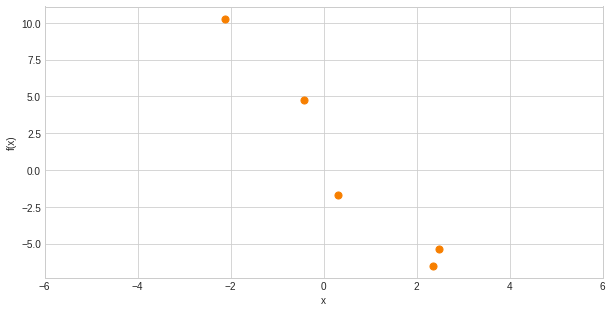

In [8]:
x_samp = x[samp_index]
y_samp = y[samp_index]
# Plot Sample points
fig, ax = plt.subplots(figsize=(10,5))
point_c = "#f77f00"
ax.scatter(x_samp, y_samp, s=50, c=point_c, zorder=10)
ax.set_xlim([-6,6])
#ax.set_ylim([-10,15])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

<div style="background-color: #ccffcc; padding: 10px;">

From these few points it's not obvious what fuction `y` could possibly be. So we can use Gaussian Processes to help work out the unknown function from these few points

The covariance matrix $\Sigma$ is determined by its covariance function $k$, which is often also called the kernel of the Gaussian process. Here we will use the [Radial Basis Function Kernal](https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a):
    
$\begin{equation}
 K(X_1,X_2) = exp(-{\frac{||X_1 - X_2|| ^2}{2\sigma^2}}) 
\end{equation}$

where $\sigma$ is the variance and hyperparameter and $$||X_1 - X_2|| ^2$$ is the is the Euclidean distance between two points 
    
this is defined in the function `rbf_kernel`
</div>

In [9]:
# radial basis function kernel
def rbf_kernel(x1, x2, var, lscale):
    """
        Compute the Euclidean distance between each row of X and X2, or between
        each pair of rows of X if X2 is None and feed it to the kernel.
     """
    if x2 is None:
        d = cdist(x1, x1)
    else:
        d = cdist(x1, x2)
    K = var*np.exp(-np.power(d,2)/(lscale**2))
    return K

<div style="background-color: #ccffcc; padding: 10px;">

so `K` can be obtained via `rbf_kernel` and $\mu$ `mu` is often assumed to be zero as a starting point
</div>

<div style="background-color: #cce5ff; padding: 10px;">

try adjusting `lscale` to see what happens with the results
e.g. after running through the first time set `lscale=5` and run through all cells again
    
Increasing the length parameter increases the banding, as points further away from each other become more correlated. 
    
</div>

In [10]:
lscale = 1.0
K_rbf = rbf_kernel(x.reshape(-1,1), None, 1.0, lscale)
mu = np.zeros(x.shape[0])
f_rbf = np.random.multivariate_normal(mu, K_rbf, 100)

In [11]:
rv = multivariate_normal(np.zeros(2), rbf_kernel(np.arange(0,2).reshape(-1,1), None, 1.0, 2.0))

In [12]:
#Create grid and multivariate normal
a = np.linspace(-3,3,500)
b = np.linspace(-3,3,500)
X, Y = np.meshgrid(a,b)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

<div style="background-color: #ccffcc; padding: 10px;">

Stochastic processes, such as Gaussian processes, are essentially a set of random variables. In addition, each of these random variables has a corresponding index $i$. We will use this index to refer to the $i$-th dimension of our nnn-dimensional multivariate distributions.
    
Below, we have a two-dimensional normal distribution. Each dimension $y_i$ is assigned an index $ i \in {1,2}$.  This representation allows us to understand the connection between the covariance and the resulting values: the underlying Gaussian distribution has a positive covariance between $y_1$ and $y_1$ -  this means that $y_2$ will increases as $y_1$ gets larger and vice versa. 
</div>

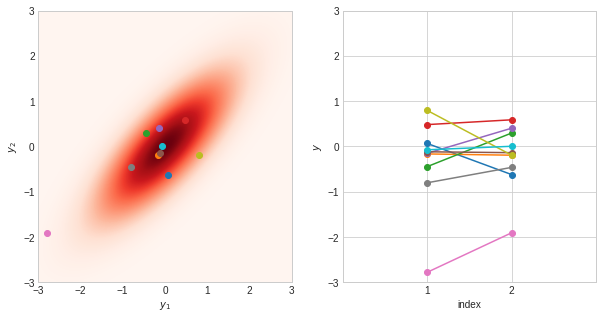

In [13]:
grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.3)
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax1.contourf(X, Y, rv.pdf(pos), cmap="Reds", levels=300)
for index in range(10):
    rand_y1, rand_y2 = np.random.multivariate_normal(np.zeros(2), rbf_kernel(np.arange(0,2).reshape(-1,1), None, 1.0, 2.0), 1)[0]
    ax1.scatter(rand_y1, rand_y2)
    ax1.set_xlabel("$y_1$")
    ax1.set_ylabel("$y_2$")
    ax2.plot(np.arange(1,3), [rand_y1, rand_y2], '-o')
    ax2.set_xlim([0,3])
    ax2.set_ylim([-3,3])
    ax2.set_xlabel("index")
    ax2.set_ylabel("$y$")
    ax2.set_xticks([1,2])

<div style="background-color: #ccffcc; padding: 10px;">
The more horizontal the lines are the more strongly correlated 
</div>

In [14]:
# rbf_kernel(X1,X2,var,lscale)
rbf_kernel(np.arange(0,2).reshape(-1,1), None, 1.0, lscale)

array([[1.        , 0.36787944],
       [0.36787944, 1.        ]])

<div style="background-color: #ccffcc; padding: 10px;">

## Prior distribution

The following figure shows samples of potential functions from prior distributions that were created using RBF kernel
</div>

Text(0.5, 1.0, 'GP samples from RBF where lscale =1.0')

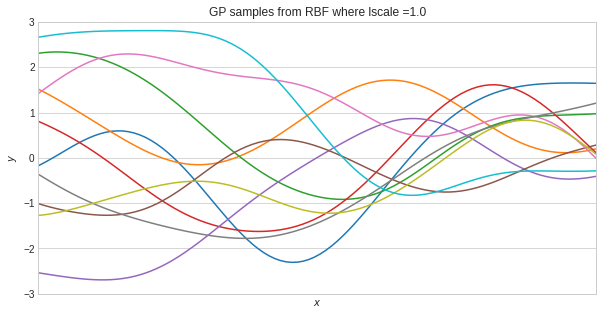

In [15]:
var_index = np.linspace(0, 20,100)
fig, ax = plt.subplots(figsize=(10,5))
for index in range(10):
    ax.plot(var_index, np.random.multivariate_normal(np.zeros(var_index.shape[0]), rbf_kernel(var_index.reshape(-1,1), None, 1.0, 5.0), 1)[0])
    ax.set_xlim(0,20)
    ax.set_ylim(-3,3)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_xticks([])
ax.set_title('GP samples from RBF where lscale ='+str(lscale))

In [16]:
# Covariance matric from the RBF kernel
# rbf_kernel(X1,X2,var,lscale)
K_rbf = rbf_kernel(x.reshape(-1,1), None, 1.0, lscale)
# mu = 0
mu = np.zeros(x.shape[0])
# fuctions from rbf kernel
f_rbf = np.random.multivariate_normal(mu, K_rbf, 100)

Text(0.5, 1.0, '100 GP samples from  RBF kernel were lscale =1.0')

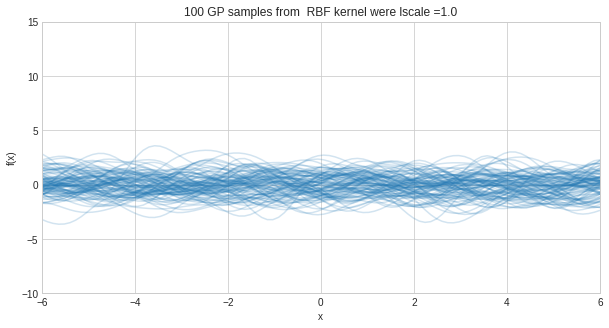

In [17]:
# plot 1000 GP samples
index=100
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, f_rbf.T[:,0:index], color='C0', alpha=0.2)
ax.set_xlim([-6,6])
ax.set_ylim([-10,15])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title('100 GP samples from  RBF kernel were lscale ='+str(lscale))

<div style="background-color: #ccffcc; padding: 10px;">
as $\mu$ is set to zero all fuctions are functions are distributed normally around the mean $\mu$ (0)
</div>

<div style="background-color: #ccffcc; padding: 10px;">

## Posterior distribution

now we're going to activate training data which we can add back into our distribution 

1. First, we form the joint distribution between all x points `x` and the training points `x_samp` which gives `k_starX` 
2. we can the use `k_xx` (covariance matrix of test x points) `k_starstar` covariance matix of all x to calculate $\mu_{pred}$ and $K_{pred}$
    
$\begin{equation}
\boldsymbol \mu_{\text{pred}} = \mathbf{K}_*^\top \left[\mathbf{K} + \sigma^2 \mathbf{I}\right]^{-1} \mathbf{y}
\end{equation}$
    
$\begin{equation}
\mathbf{K}_{\text{pred}} = \mathbf{K}_{*,*} - \mathbf{K}_*^\top \left[\mathbf{K} + \sigma^2 \mathbf{I}\right]^{-1} \mathbf{K}_*.
\end{equation}$
 
</div>

In [18]:
k_starX = rbf_kernel(x.reshape(-1,1), x_samp.reshape(-1,1), 3, lscale)

# K from sample point
k_xx = rbf_kernel(x_samp.reshape(-1,1), None, 3, lscale)
k_starstar = rbf_kernel(x.reshape(-1,1), None, 3, lscale)

In [19]:
print('no training data multivariate Gaussian distribution shape = ' +str(k_starstar.shape))
print('sample-whole multivariate Gaussian distribution shape = ' +str(k_starX.shape))
print('whole multivariate Gaussian distribution shape = ' +str(k_starX.shape))

no training data multivariate Gaussian distribution shape = (100, 100)
sample-whole multivariate Gaussian distribution shape = (100, 5)
whole multivariate Gaussian distribution shape = (100, 5)


In [20]:
mu = k_starX.dot(np.linalg.inv(k_xx)).dot(y_samp).flatten()
var = k_starstar - k_starX.dot(np.linalg.inv(k_xx)).dot(k_starX.T)

<div style="background-color: #cce5ff; padding: 10px;">

If you get an error here please return to [generate sample](#generate-sample) section to check for duplicated sample points

</div>

<div style="background-color: #ccffcc; padding: 10px;">
In the constrained covariance matrix `var`, we can see that the correlation of neighbouring points is affected by the training data. If a predicted point lies on the training data, there is no correlation with other points. Therefore, the function must pass directly through it. Predicted values further away are also affected by the training data: proportional to their distance. 
</div>

(-0.5, 99.5, 99.5, -0.5)

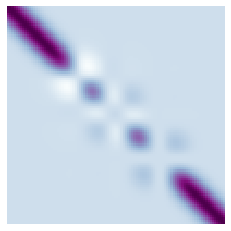

In [21]:
fig, ax = plt.subplots()
ax.imshow(var, cmap="BuPu", interpolation='None')
ax.axis(False)

In [22]:
# functions from new mu and covariance matrix
f_star = np.random.multivariate_normal(mu, var, 100)
f_star_mean = f_star.mean(axis=0)
f_star_std = f_star.std(axis=0)

<div style="background-color: #ccffcc; padding: 10px;">

Now we have our function prectitons `f_star`that intercepts all training points
</div>

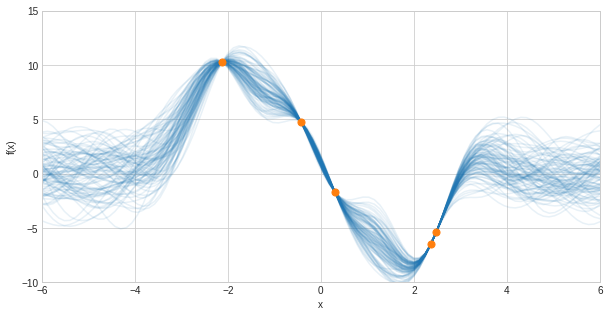

In [23]:
# plot predictions
fig, ax = plt.subplots(figsize=(10,5))
#plt.scatter(x, y, 100, 'k', 'o', zorder=100)
ax.scatter(x_samp, y_samp, s=50, c="C1", zorder=10)
ax.plot(x, f_star.T, color='C0', alpha=0.1)
# if you have altered the function you may need to alter the y lim
ax.set_xlim([-6,6])
ax.set_ylim([-10,15])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.show()

<div style="background-color: #ccffcc; padding: 10px;">

We can plot below the mean prediction fuction and the stardard deviation. Away from training points the standard deviation is much higher. Reflecting the lack of knowledge in these areas. 
</div>

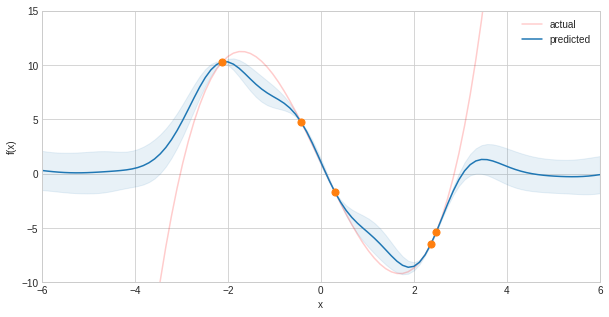

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x_samp, y_samp, s=50, c="C1", zorder=10)
ax.plot(x,y,color='r',alpha=0.2)
ax.plot(x, f_star_mean, color='C0')
ax.fill_between(x.flatten(), f_star_mean+f_star_std, f_star_mean-f_star_std, alpha=0.1, color='C0')
ax.set_xlim([-6,6])
# if you have altered the function you may need to alter the y lim
ax.set_ylim([-10,15])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend(['actual','predicted'])

<div style="background-color: #ccffcc; padding: 10px;">
Since the RBF kernel is stationary it will always return to $\mu=0$ in regions further away from observed training data. This decreases the accuracy for predictions that reach further into the past or the future.
</div>

# Sea Level Example

<div style="background-color: #ccffcc; padding: 10px;">

Now lets look at an exaple using Gaussian Prossess to Predict sea level change using model out put sea level data provided by Oliver Pollard.    

<img src="images/sealevel_data.png">

        
</div>

# Load Data 

<div style="background-color: #cce5ff; padding: 10px;">

For this example we're using data provided in python [.npy files](https://towardsdatascience.com/what-is-npy-files-and-why-you-should-use-them-603373c78883) containing relative sea level change at a single point in the southern north sea at 122 (ka). `highstand` data we will use to test our predictions 
    
<img src="images/sealevel_data_ts.png">
  
 </div>

In [25]:
highstand = np.load("data/highstand_data.npy")

<div style="background-color: #cce5ff; padding: 10px;">
    
We can use 4 parameters provided in `parameter_data.npy` which correspond to the parameters listed below

<img src="images/sea_level_parameters.png">

</div>

In [26]:
parameters = np.load('data/parameter_data.npy')

# Normalise Data


In [27]:
# useful functions
def stack_parameters(*parameters):
    return np.column_stack([[*parameters]]).T

def normalise(parameters):
    normalised_parameters = np.zeros_like(parameters)
    normalisation_values = []
    for index, parameter in enumerate(parameters.T):
        shift = - np.min(parameter)
        scale = np.max(parameter + shift)
        normalised_parameters[:,index] = (parameter + shift)/scale
        normalisation_values.append((shift, scale))
        
    return normalised_parameters, normalisation_values
    

In [28]:
            
# move parameter ranges down to improve results
p1 = parameters[:,0]
p2 = parameters[:,1]
p3 = parameters[:,2]
p4 = parameters[:,3]
parameters = stack_parameters(p1, p2, p3, p4)
highstand = highstand.reshape(-1,1)

parameters_norm, parameters_norm_params = normalise(parameters)
highstand_norm, highstand_norm_params = normalise(highstand)

# Plot Data


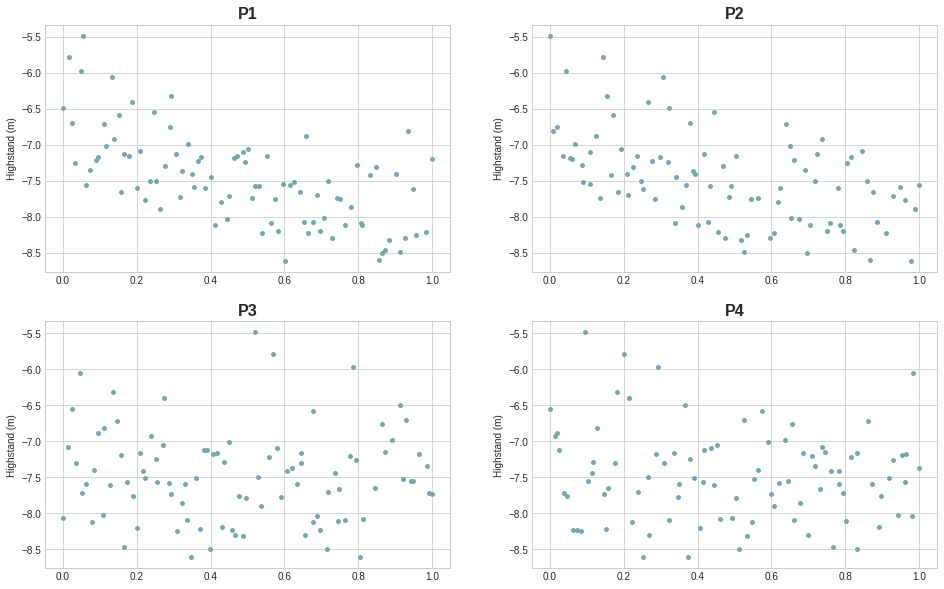

In [29]:
# plot data for parameter
scatter_fig = plt.figure(figsize=[16,10])
for index in range(4):
    ax = scatter_fig.add_subplot(221+index)
    ax.scatter(parameters_norm[:,index], highstand, s=15, c="#71a8ad")
    ax.set_title(f"P{index+1}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Highstand (m)")

## Plot parameters against other parameters

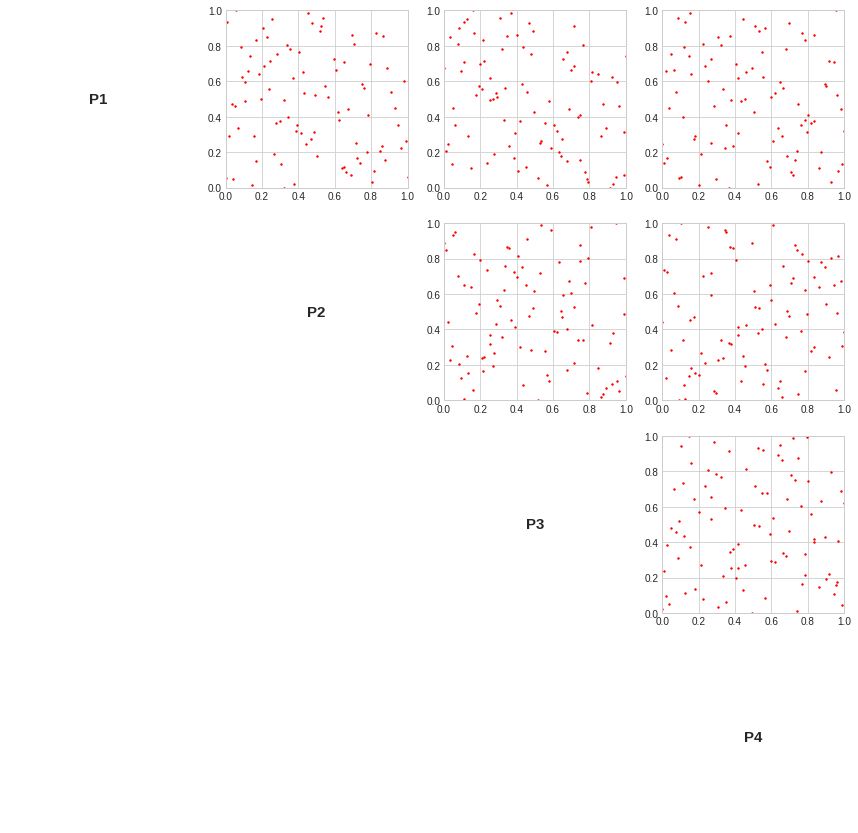

In [30]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
for index_1 in range(4):
    for index_2 in range(4):
        if index_1 == index_2:
            ax[index_1, index_2].axis('off')
            ax[index_1, index_2].text(0.5,0.5,f"P{index_1+1}",horizontalalignment="center",
                                      verticalalignment="center", fontsize=15, 
                                      fontweight='bold')
        elif index_2 < index_1:
            ax[index_1, index_2].axis('off')
            
        else:
            ax[index_1, index_2].scatter(parameters_norm[:,index_2], parameters_norm[:,index_1],s=2,c="red")
            ax[index_1, index_2].set_xlim([0,1])
            ax[index_1, index_2].set_ylim([0,1])

In [31]:
# Over lay sparse points in red over the points to be predicted in blue

In [32]:
predict_coords = np.load("data/predict_points.npy")

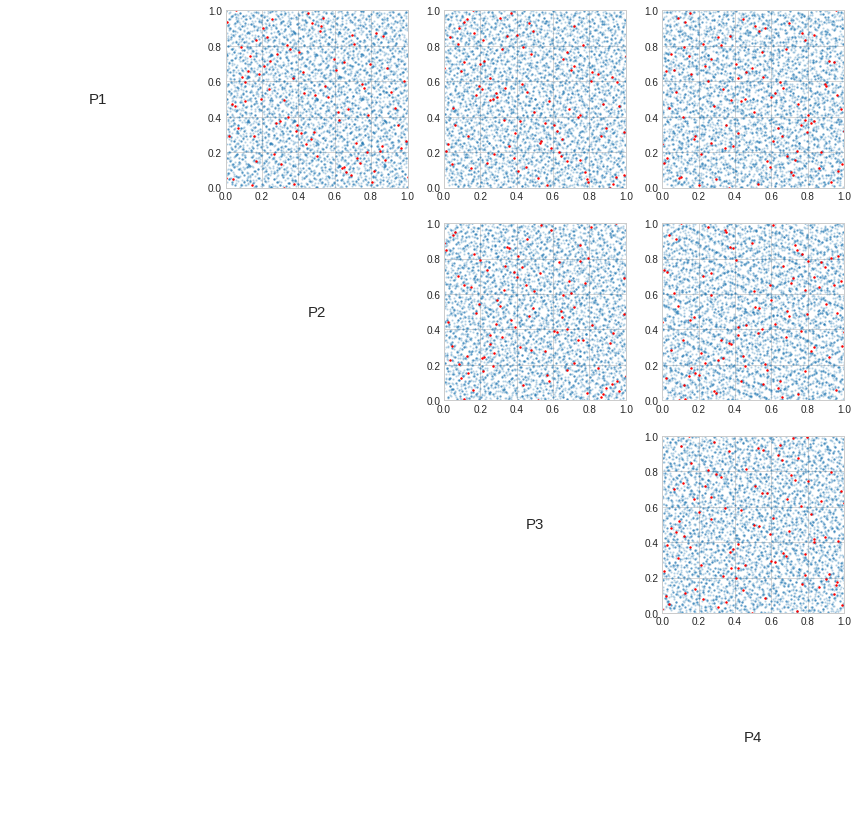

In [33]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
for index_1 in range(4):
    for index_2 in range(4):
        if index_1 == index_2:
            ax[index_1, index_2].axis('off')
            ax[index_1, index_2].text(0.5,0.5,f"P{index_1+1}",
                                      horizontalalignment="center",
                                      verticalalignment="center", fontsize=15)
        elif index_2 < index_1:
            ax[index_1, index_2].axis('off')
            
        else:
            ax[index_1, index_2].scatter(predict_coords[:,index_2], predict_coords[:,index_1],s=2,c="C0", alpha=0.2)
            ax[index_1, index_2].scatter(parameters_norm[:,index_2], parameters_norm[:,index_1],s=2,c="red")
            ax[index_1, index_2].set_xlim([0,1])
            ax[index_1, index_2].set_ylim([0,1])

## Define GP flow model

<div style="background-color: #cce5ff; padding: 10px;">

We're going to use the python library [GP flow model](https://gpflow.readthedocs.io/en/master/notebooks/basics/regression.html) to create our guassian process model to creat a more complex model that in our previous example in less lines of code
    
`k = gpflow.kernels.Matern52(lengthscales=lscale)`  selects a [kernal is selected](https://gpflow.readthedocs.io/en/master/notebooks/advanced/kernels.html)  

`m = gpflow.models.GPR(data=(X, Y), kernel=k, mean_function=None)' constructs a regression model from data points and the selected kernal. 


</div>

In [34]:

k = gpflow.kernels.Matern52(lengthscales=np.ones((len(parameters_norm.T))))
print_summary(k)

2021-07-27 10:36:15.187185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-27 10:36:15.187204: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-27 10:36:15.187221: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (marvin): /proc/driver/nvidia/version does not exist
2021-07-27 10:36:15.188441: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


name,class,transform,prior,trainable,shape,dtype,value
Matern52.variance,Parameter,Softplus,,True,(),float64,1.0
Matern52.lengthscales,Parameter,Softplus,,True,"(4,)",float64,"[1., 1., 1...."


In [35]:
m = gpflow.models.GPR(data=(parameters_norm, highstand_norm), kernel=k, mean_function=None)
print_summary(m)

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPR.kernel.lengthscales,Parameter,Softplus,,True,"(4,)",float64,"[1., 1., 1...."
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


## Optamization

<div style="background-color: #cce5ff; padding: 10px;">
    
`opt = gpflow.optimizers.Scipy()` uses the Scipy optimizer, which by default implements the L-BFGS-B algorithm
    
`opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))` calls the minimize method of an optimizer which uses the training_loss defined by the GPflow model and the variables to train with  and the number of iterations

</div>

In [36]:
opt = gpflow.optimizers.Scipy()
opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))
print_summary(m)

2021-07-27 10:36:15.260126: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2021-07-27 10:36:16.416037: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-27 10:36:16.440080: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2099940000 Hz


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,5.585300008757415
GPR.kernel.lengthscales,Parameter,Softplus,,True,"(4,)",float64,"[2.68187365, 3.66118876, 6.0572698..."
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0129000087929017e-06


## Prediction


<div style="background-color: #cce5ff; padding: 10px;">
    
`m.predict_f` predicts at the new points producing a mean and variance we'll create an array of predicted means `predict` and variance `predict_var` by looping over the normalised training data from our parameters     
</div>

In [37]:
mean, var = m.predict_f(np.asarray([[0.2,0.5,0.6,0.7]]))
print(mean.numpy()[0][0], var.numpy()[0][0])

0.45757607196216493 1.0797173022325524e-06


In [38]:
mean, var = m.predict_f(predict_coords)
print(mean.numpy()[:,0], var)

[0.26936465 0.23898022 0.40307934 ... 0.1817838  0.45073476 0.67439909] tf.Tensor(
[[3.51209883e-06]
 [1.72735484e-06]
 [6.14494327e-06]
 ...
 [2.19200864e-06]
 [1.27022434e-05]
 [1.01863470e-05]], shape=(6000, 1), dtype=float64)


In [39]:
def coords_flattern(*coords):
    meshs = np.meshgrid(*coords)
    return np.column_stack(([mesh.ravel() for mesh in meshs]))

In [40]:
predict = []
predict_var = []
for index, point in enumerate(parameters_norm):
    parameters_norm_training = np.delete(parameters_norm, index, axis=0)
    highstand_norm_training = np.delete(highstand_norm, index, axis=0)
    
    k = gpflow.kernels.Matern52(lengthscales=np.ones((len(parameters.T))))
    m = gpflow.models.GPR(data=(parameters_norm_training, highstand_norm_training), kernel=k, mean_function=None)
    opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))
    
    lop = parameters_norm[index]
    meanp, varp = m.predict_f(coords_flattern([lop[0]],[lop[1]],[lop[2]],[lop[3]]))
    predict_var.append(varp.numpy()[0][0])
    predict.append(meanp.numpy()[0][0])

## Cross Validation


<div style="background-color: #cce5ff; padding: 10px;">
    
we can now our predicted values  `predict` against our actual values `highstand` *normalised*
</div>

Text(0.5, 0, 'Actual Highstand Normalised')

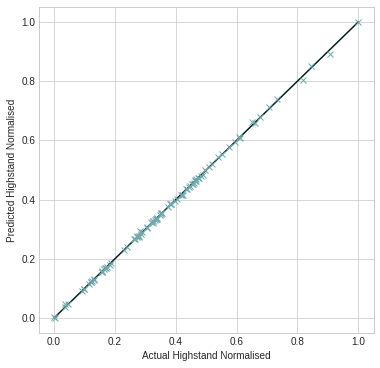

In [41]:
fig, ax = plt.subplots(figsize=[6,6])
ax.plot(np.linspace(0,1,num=100), np.linspace(0,1,num=100), c="#031f1d")
ax.plot(highstand_norm, predict, 'x', c="#71a8ad")
ax.errorbar(highstand_norm, predict, yerr=predict_var, linestyle="None")
ax.set_ylabel("Predicted Highstand Normalised")
ax.set_xlabel("Actual Highstand Normalised")

## Plot High Stands

<div style="background-color: #cce5ff; padding: 10px;">

We can now plot the actual predictions `mean` in purple with the grey dots showing its in keeping with the actual data `highstand_norm`    
</div>

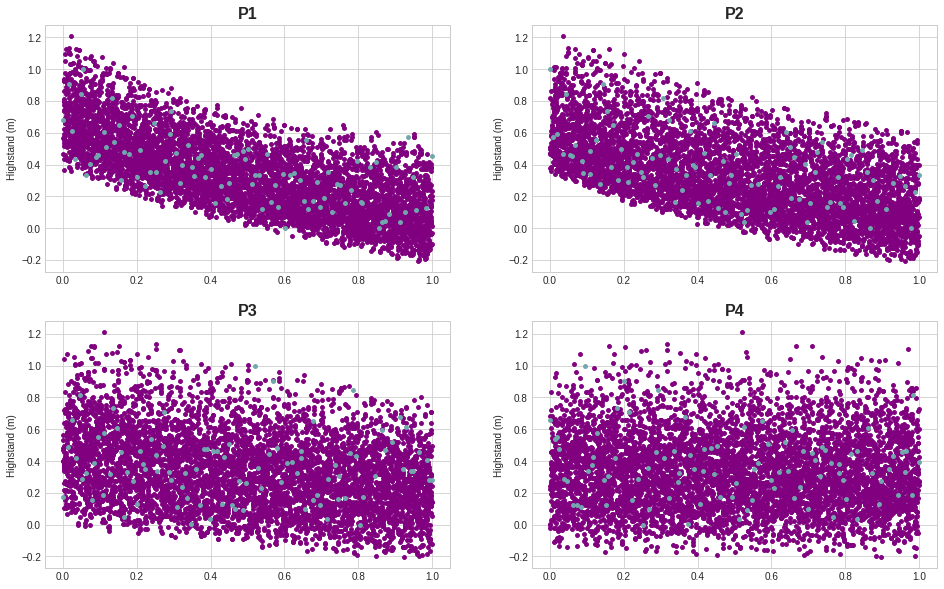

In [42]:
# plot data for parameter
scatter_fig = plt.figure(figsize=[16,10])
for index in range(4):
    ax = scatter_fig.add_subplot(221+index)
    ax.scatter(predict_coords[:,index], mean.numpy()[:,0], s=15, c="purple")
    ax.scatter(parameters_norm[:,index], highstand_norm, s=15, c="#71a8ad")
    ax.set_title(f"P{index+1}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Highstand (m)")